In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots() allows for two plots to be made, with one intended to be a subplot of the other

In [6]:
a = np.linspace(0,10,11)
b = a ** 4
x = np.arange(0,10)
y = 2*x

Two relationships: one is linear, one is exponential. Either .linspace() or .arange() could work to accomplish this depending on the goal

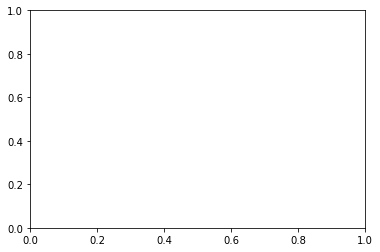

In [7]:
fig,axes = plt.subplots()

Note: plt.subplot() is a completely different method call

In [8]:
axes

<AxesSubplot:>

In this case, there would probably not be any need to use plt.subplots() since so far there is only plot

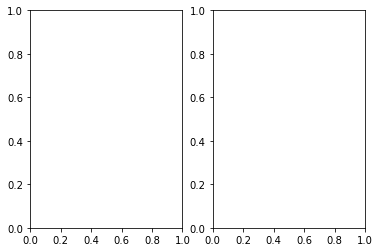

In [9]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)

This could be done manually using .plot(), but this method is generally easier.
Also note: the nrows and ncols arguments refer to the number of rows and columns of plots required.

In [10]:
axes.shape

(2,)

In [11]:
axes[0].plot(x,y)

In [12]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

axes is itself a numpy array, so in order to plot within it, I have to index it:

axes[0].plot(x,y)

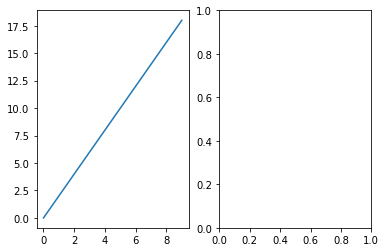

In [16]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(x,y)

Aparently the axes in 

fig, axes

and the axes in

axes[0].plot(x,y) 

are different things. One is a variable, one is an inherit object of matplotlib

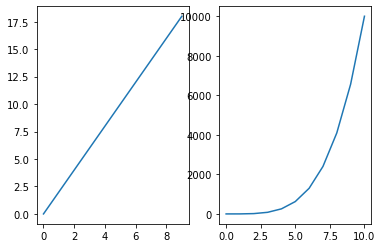

In [17]:
fig,axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(x,y)
axes[1].plot(a,b)

Ahh yeah, very convenient, but the spacing isn't right yet

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

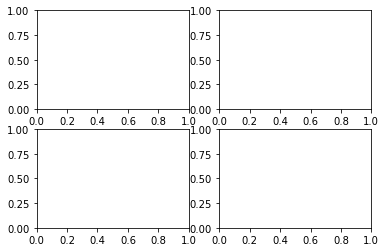

In [19]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0].plot(x,y)
axes[1].plot(a,b)

This is producing an error because the axes array is now two-dimensional:

In [20]:
type(axes)

numpy.ndarray

In [21]:
axes.shape

(2, 2)

In [22]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

So now, specifying which plot to use looks like this:

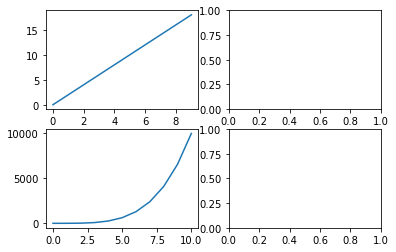

In [23]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[1][0].plot(a,b)

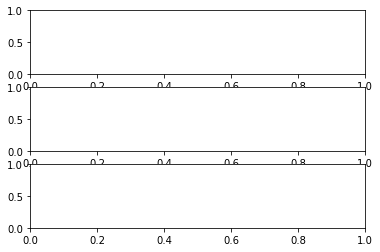

In [28]:
fig,axes = plt.subplots(nrows = 3, ncols = 1)

Stacked plots like this are common

In [29]:
type(axes)

numpy.ndarray

In [30]:
axes.shape

(3,)

It's one-dimensional again

In [34]:
axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

The three plots are just stacked one on top of the other in this numpy list

In [32]:
axes[0]

<AxesSubplot:>

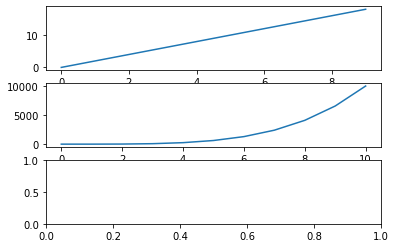

In [33]:
fig,axes = plt.subplots(nrows = 3, ncols = 1)
axes[0].plot(x,y)
axes[1].plot(a,b)

This can also be done with a for loop if the same plot is needed over and over again for some reason

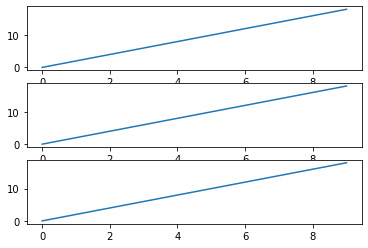

In [37]:
fig,axes = plt.subplots(nrows = 3, ncols = 1)

for ax in axes:
    ax.plot(x,y)

Presumably, there's a way to do something like:

for ax in axes:
    
    ax.plot(x[n],y)
    n += 1
    
In order to cycle through a list of plots which need to be done

Fixing the look of everything - there's two options:

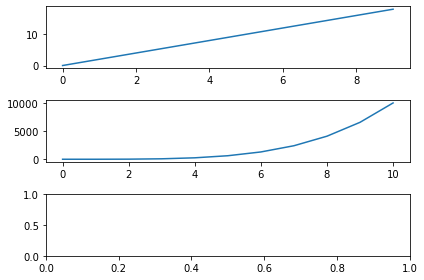

In [38]:
fig,axes = plt.subplots(nrows = 3, ncols = 1)
axes[0].plot(x,y)
axes[1].plot(a,b)

plt.tight_layout()

The first way is plt.tight_layout()

This can also be done manually:

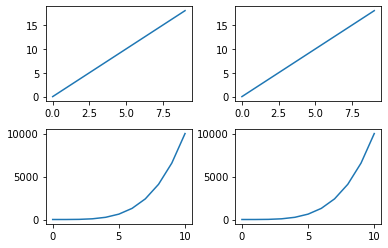

In [44]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[1][0].plot(a,b)
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.subplots_adjust(wspace = .3, hspace = .3)

Messing with wspace and hpace will change the space on the X and Y between the axes. Generally, less than 1 is a good amount to adjust

This number refers to the fraction of the average width/height of the graph along that axes . . . but really, that's not super important to know, it's better to just experiment

Now, editing and exporting:
---

Setting X and Y axes labels:

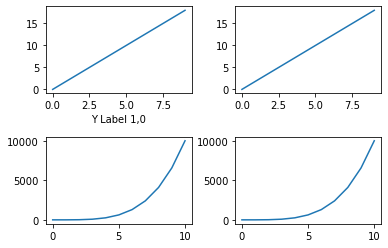

In [50]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[0][0].set_xlabel('Y Label 1,0')
axes[1][0].plot(a,b)
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.subplots_adjust(wspace = .3, hspace = .5)

Note: You can't set the axes label and specify the data in the same line

i.e. you have to do

axes[0][0].plot(x,y) </br>
axes[0][0].set_xlabel('Y Label 1,0')

NOT


axes[0][0].plot(x,y).set_xlabel('Y Label 1,0')

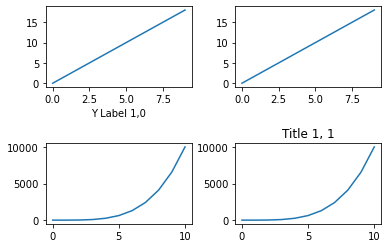

In [54]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[0][0].set_xlabel('Y Label 1,0')
axes[1][0].plot(a,b)
axes[1][1].set_title('Title 1, 1')
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.subplots_adjust(wspace = .3, hspace = .7)

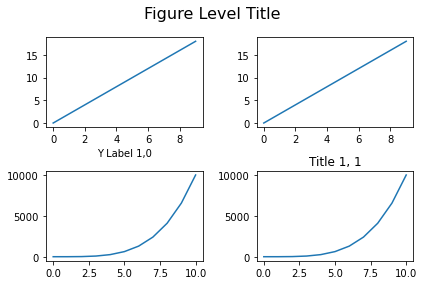

In [61]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[0][0].set_xlabel('Y Label 1,0')
axes[1][0].plot(a,b)
axes[1][1].set_title('Title 1, 1')
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.suptitle("Figure Level Title", fontsize = 16)
plt.tight_layout()

There are many parameters for adjusting font size, centering, x,y position, etc. for fig.suptitle(), i.e. the figure-level title

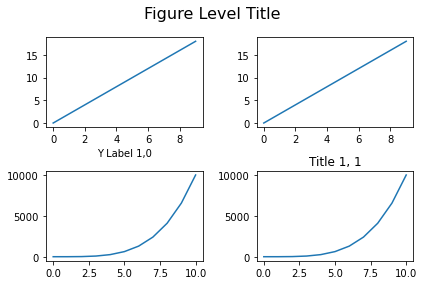

In [62]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[0][0].set_xlabel('Y Label 1,0')
axes[1][0].plot(a,b)
axes[1][1].set_title('Title 1, 1')
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.suptitle("Figure Level Title", fontsize = 16)
plt.tight_layout()

fig.savefig('new_subplots.png', bbox_inches='tight')

There are both figure-level adjustments which can be made, and adjustments to the individual subplots. Figure-level width adjustments:

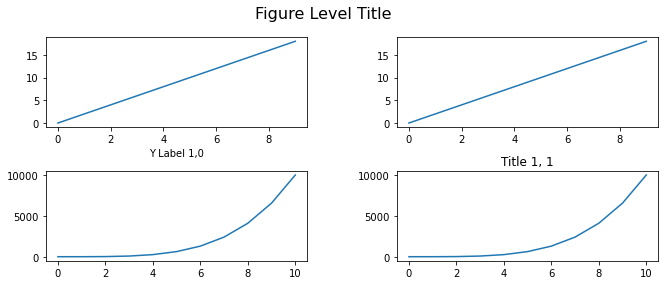

In [64]:
fig,axes = plt.subplots(nrows = 2, ncols = 2)
axes[0][0].plot(x,y)
axes[0][0].set_xlabel('Y Label 1,0')
axes[1][0].plot(a,b)
axes[1][1].set_title('Title 1, 1')
axes[0][1].plot(x,y)
axes[1][1].plot(a,b)

fig.suptitle("Figure Level Title", fontsize = 16)
plt.tight_layout()

fig.set_figwidth(10)

Now the entire plot is way wider